In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

#### Example 1

In [3]:
X = np.array([[1, 2], [1, 4], [5, 2], [5, 4], [9, 2], [9, 4]])

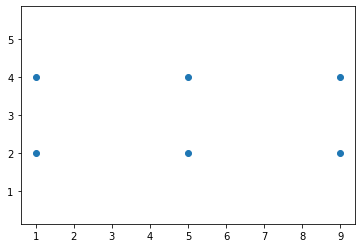

In [35]:
plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1]);

In [20]:
model = KMeans(n_clusters=3, random_state=0)

In [21]:
y = model.fit(X)

In [22]:
y.labels_

array([1, 1, 2, 2, 0, 0])

In [23]:
y.predict([[0, 0]])

array([1])

In [24]:
y.cluster_centers_

array([[9., 3.],
       [1., 3.],
       [5., 3.]])

In [25]:
y.cluster_centers_[0]

array([9., 3.])

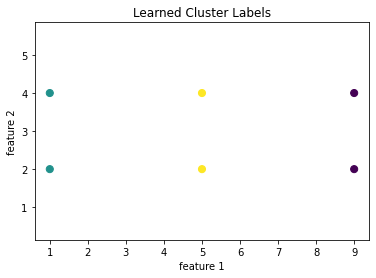

In [34]:
fig, ax = plt.subplots(figsize=(6,4))
ax.axis('equal')

ax.scatter(X[:, 0], X[:, 1], s=50, c=y.labels_, cmap='viridis')

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_title('Learned Cluster Labels');

#### Example 2 - iris

In [3]:
 iris = load_iris()

In [4]:
kmn = KMeans(n_clusters=3)
kmn.fit(iris.data)
labels = kmn.predict(iris.data)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

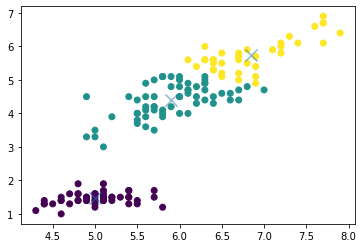

In [8]:
xs = iris.data[:,0]
ys = iris.data[:,2]
centroids = kmn.cluster_centers_
plt.scatter(xs, ys, c=labels)
plt.scatter(centroids[:,0], centroids[:,2], marker='x', s=150, alpha=0.5)
plt.show()

##### evaluation a clustering
**inertia** :distance from each sample to centroids of its cluster or how spread out the clusters.
(Lower is better)

In [10]:
print(kmn.inertia_)

78.85144142614601


In [27]:
import time


In [29]:
inertia_list = []
for k in np.arange(1, 6):
    kmn = KMeans(n_clusters=k)
    kmn.fit(iris.data)
    inertia_list.append(kmn.inertia_)
inertia_list

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.472230158730156]

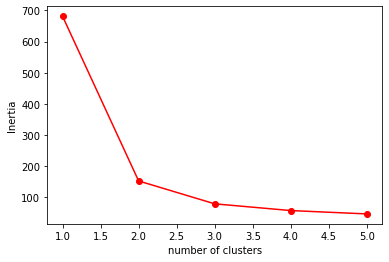

In [30]:
plt.plot(np.arange(1,6),inertia_list,'ro-')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()